<a href="https://colab.research.google.com/github/azizomran/Trading-with-Momentum/blob/master/momentum_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                 High        Low       Open  ...         r   MA_Adj_5  MA_Adj_30
Date                                         ...                                
2019-02-11  38.200001  37.099998  37.900002  ... -0.003971  34.779387  32.811985
2019-02-12  38.000000  37.450001  37.450001  ... -0.001327  34.871250  33.001835
2019-02-13  37.750000  37.400002  37.599998  ... -0.006662  34.779388  33.191686
2019-02-14  37.500000  36.950001  37.500000  ...  0.002670  34.558916  33.376943
2019-02-17  37.299999  36.950001  37.299999  ... -0.013423  34.402749  33.540766
2019-02-18  37.250000  36.799999  37.000000  ... -0.005420  34.237395  33.657126
2019-02-19  36.700001  36.000000  36.349998  ... -0.021979  33.934247  33.742865
2019-02-20  37.200001  36.150002  36.250000  ...  0.031445  33.888315  33.842383
2019-02-21  37.250000  36.700001  37.250000  ... -0.002695  33.805638  33.912812
2019-02-24  37.250000  36.700001  37.150002  ... -0.009491  33.750521  33.964868
2019-02-25  36.700001  35.90

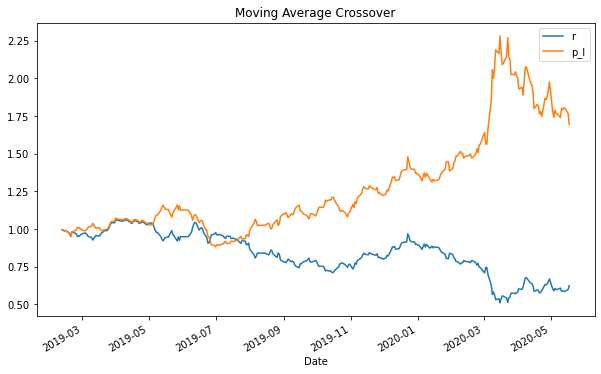

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 17 21:26:06 2020

@author: Abdulziz Al Omran
"""
#Modules
import pandas as pd
import numpy as np
from pandas_datareader import data as web


# Functions 
def MA(df, n):
    sma =pd.Series(pd.DataFrame.rolling(df['Adj Close'], n).mean(),name='MA_Adj_'+ str(n))
    df = df.join(sma)
    return df

#Variables 
start_date = '01-01-2019'
end_date = '18-05-2020'
data_source = 'yahoo'
stock = '1090.SR'
return_period = 1 #return period defines the basis of return calculations

data = pd.DataFrame()

data = pd.DataFrame(web.DataReader(stock, data_source = data_source, start=start_date, end=end_date))

#resampled_data = data.resample('M').last()
#resampled_data['r'] = np.log(resampled_data['Close'] / resampled_data['Close'].shift(1))

#resampled_data.dropna(inplace=True)
#print(resampled_data.head(5))

#resampled_data = MA(resampled_data, 30)
#resampled_data.dropna(inplace=True)
#print(resampled_data.head(50))
 
data ['r'] = np.log(data ['Adj Close'] / data['Adj Close'].shift(return_period))

data = MA(data, 5)
data = MA(data, 30)
data.dropna(inplace=True)
print(data.head(50))

data['signal'] = np.where(data['MA_Adj_5']>data['MA_Adj_30'],1,-1)

data['p_l'] = data['signal'] * data['r']
data[['r', 'p_l']].cumsum().apply(np.exp).plot(figsize=(10, 6),title="Moving Average Crossover")
print (data[['r', 'p_l']].cumsum().apply(np.exp))

